# Visual analytics of hotel bookings data

**Autor:** Julià Minguillón  
**Fecha:** April 2025

---

**NOTA**: Este tutorial utiliza Python + Jupyter Notebook + librerías de análisis y visualización para mostrar el potencial de usar visualización de datos para inspeccionar y analizar un conjunto de datos.

Recursos recomendados:
1. Pandas: https://pandas.pydata.org/
2. Matplotlib: https://matplotlib.org/
3. Seaborn: https://seaborn.pydata.org/
4. Plotly: https://plotly.com/python/

## Carga de paquetes

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import lognorm
import warnings
from datetime import datetime
import calendar

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

print('Paquetes cargados correctamente')

Paquetes cargados correctamente


## Carga de datos y dimensiones (N x M)

Leemos el dataset en formato CSV, con 119,390 filas y 32 columnas:

In [66]:
x = pd.read_csv('hotel_bookings.csv')

print(f'Dimensiones del dataset: {x.shape}')
print(f'Filas: {x.shape[0]}, Columnas: {x.shape[1]}')

Dimensiones del dataset: (119390, 32)
Filas: 119390, Columnas: 32


## Limpieza de datos

Primero, inspeccionaremos los datos usando el método `describe()` y `info()` de pandas. Puede encontrar una explicación de cada variable en el artículo que describe este dataset en detalle, aunque los nombres de las variables son bastante autoexplicativos:

In [67]:
print('=== Información del dataset ===')
print(x.info())
print('\n=== Resumen estadístico ===')
x.describe()

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-nul

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Variables numéricas

Se observan algunos valores inesperados (outliers?) en varias variables. Por ejemplo:

1. Un máximo de 55 en 'adults'
2. Un máximo de 10 en 'children' (incluyendo también valores faltantes)
3. Un máximo de 10 en 'babies'
4. Valores negativos en la tarifa diaria promedio ('adr') o valores muy altos

Visualicemos el histograma de la variable 'adults', con al menos 55 bins:

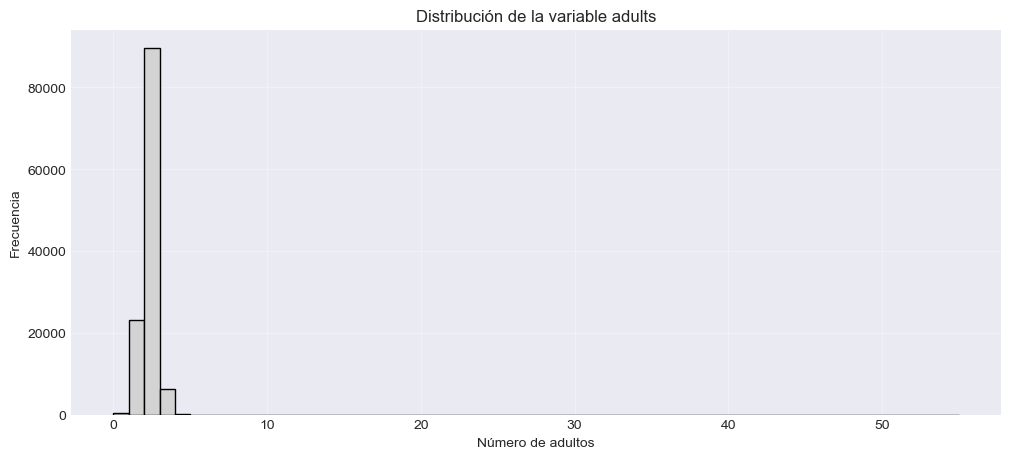

In [68]:
plt.figure(figsize=(12, 5))
plt.hist(x['adults'], bins=55, color='lightgray', edgecolor='black')
plt.xlabel('Número de adultos')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable adults')
plt.grid(alpha=0.3)
plt.show()

Se puede observar que el histograma no muestra barras alrededor del valor 55, dado que este es un conjunto muy grande y probablemente sean solo uno o pocos casos. En estos casos, para analizar los valores extremos de una variable, los valores de la variable en cuestión se pueden representar gráficamente ordenándolos y graficándolos:

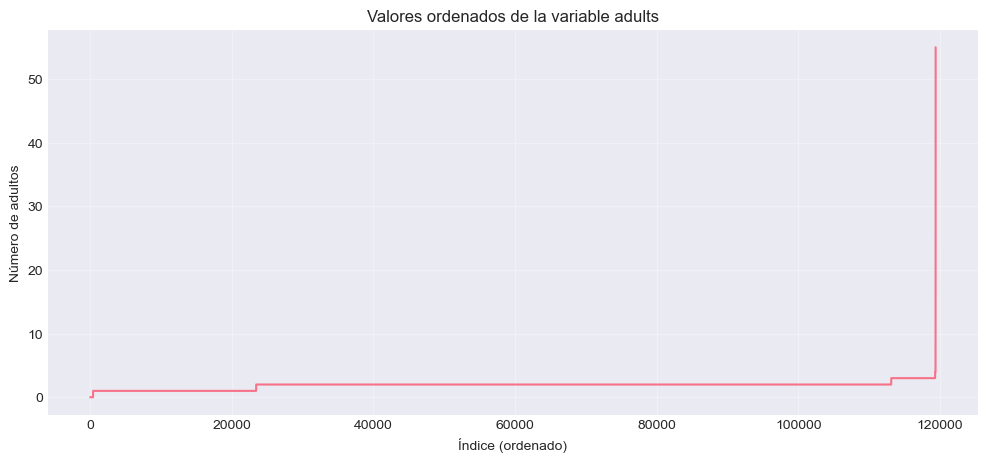

In [69]:
plt.figure(figsize=(12, 5))
plt.plot(sorted(x['adults']))
plt.grid(alpha=0.3)
plt.xlabel('Índice (ordenado)')
plt.ylabel('Número de adultos')
plt.title('Valores ordenados de la variable adults')
plt.show()

El 'Índice' representa la posición del elemento una vez ordenado, pero estamos más interesados en el eje Y, ya que podemos ver que algunos elementos tienen valores de 10 o más. Dado que esta es una variable entera con un conjunto limitado de valores posibles, podemos usar `value_counts()` para visualizarlos:

In [70]:
print('=== Tabla de frecuencias: adults ===')
print(x['adults'].value_counts().sort_index())
print('\n=== Tabla de frecuencias: children ===')
print(x['children'].value_counts().sort_index())
print('\n=== Tabla de frecuencias: babies ===')
print(x['babies'].value_counts().sort_index())

=== Tabla de frecuencias: adults ===
adults
0       403
1     23027
2     89680
3      6202
4        62
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: count, dtype: int64

=== Tabla de frecuencias: children ===
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

=== Tabla de frecuencias: babies ===
babies
0     118473
1        900
2         15
9          1
10         1
Name: count, dtype: int64


Como puede ver, hay una reserva para 10 adultos, dos para 20 adultos, y así sucesivamente, ¡hasta una para 55 adultos! Sin entrar en más detalles, eliminaremos todas las filas con reservas para 10 o más adultos:

In [71]:
x = x[x['adults'] < 10]
print(f'Datos después de limpiar adults: {x.shape}')

Datos después de limpiar adults: (119377, 32)


**EJERCICIO**: Repetir este proceso con las variables 'children' y 'babies'. Intentar también cambiar el umbral a menos de 5 en lugar de 10.

In [72]:
x = x[x['adults'] < 5]
x = x[x['children'] < 5]
x = x[x['babies'] < 5]

print(f'Datos después de limpiar adults, children y babies: {x.shape}')

Datos después de limpiar adults, children y babies: (119367, 32)


El histograma de la variable 'adr' (average daily rate - tarifa diaria promedio) presenta el mismo problema que la variable 'adults', por lo que simplemente crearemos un gráfico con los valores ordenados nuevamente:

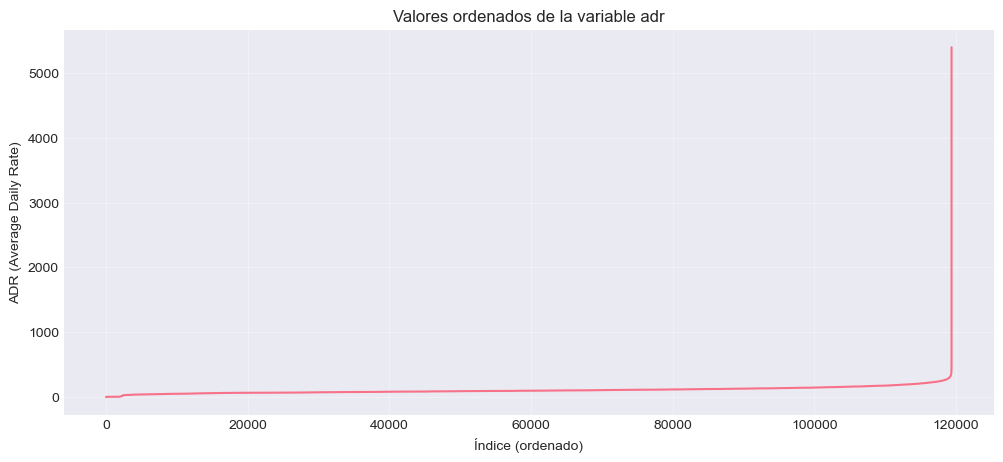

In [73]:
# Gráfico de ADR ordenado
plt.figure(figsize=(12, 5))
plt.plot(sorted(x['adr']))
plt.grid(alpha=0.3)
plt.xlabel('Índice (ordenado)')
plt.ylabel('ADR (Average Daily Rate)')
plt.title('Valores ordenados de la variable adr')
plt.show()

En este caso, observamos que solo un valor es significativamente más alto que el resto. Lo consideramos un outlier y lo eliminamos, así como los valores negativos que no tienen una explicación clara, aunque mantenemos los valores 0:

In [74]:
# Limpiar outliers en adr
x = x[(x['adr'] >= 0) & (x['adr'] < 1000)]

print(f"Datos después de limpiar adr: {x.shape}")

Datos después de limpiar adr: (119365, 32)


El histograma ahora nos proporciona información relevante. Lo dibujamos usando seaborn, que ofrece muchas más opciones que el histograma básico:

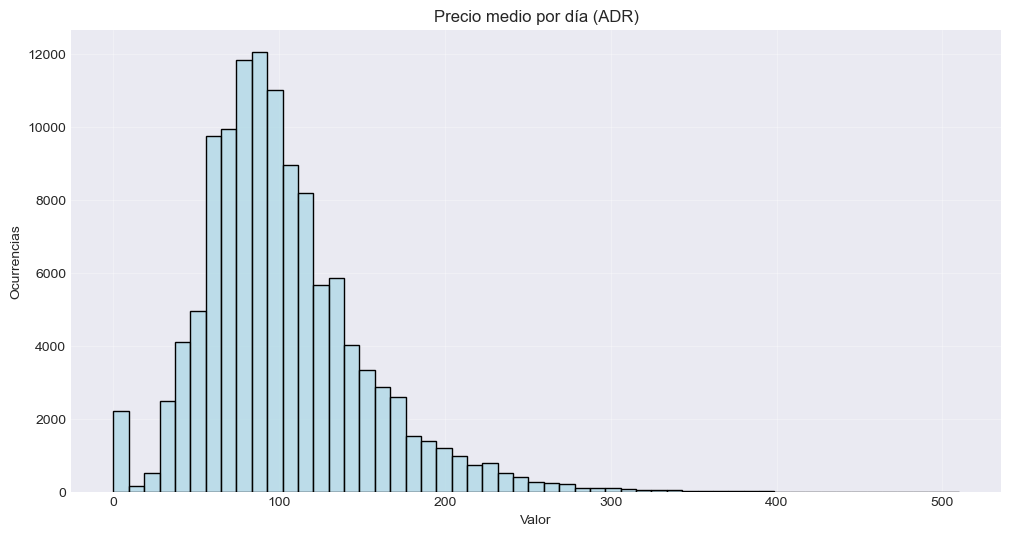

In [75]:
# Histograma mejorado de ADR
plt.figure(figsize=(12, 6))
sns.histplot(x['adr'], bins=55, color='lightblue', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Ocurrencias')
plt.title('Precio medio por día (ADR)')
plt.grid(alpha=0.3)
plt.show()

Podemos ver que hay un conjunto de aproximadamente 2,000 valores cero, que podrían analizarse por separado, por ejemplo. 

Para experimentar con el conjunto de datos más limpio posible, haremos lo siguiente:

1. Eliminar estancias de 0 días
2. Eliminar estancias de coste 0
3. Eliminar estancias sin huéspedes
4. Reemplazar los NAs en la variable children con 0

In [76]:
# Limpieza final de datos
x['children'] = x['children'].fillna(0)
x = x[(x['adr'] > 0) & 
      ((x['stays_in_week_nights'] + x['stays_in_weekend_nights']) > 0) & 
      ((x['adults'] + x['children'] + x['babies']) > 0) & 
      (x['children'].notna())]

print(f"Datos después de limpieza final: {x.shape}")

Datos después de limpieza final: (117391, 32)


## Variables categóricas

Para las variables categóricas, el método `describe()` nos da una primera idea de los valores posibles que cada una puede tomar. Por ejemplo, en el conjunto original (antes de eliminar outliers), hay reservas en un hotel de ciudad (Lisboa) y en un resort (Algarve). Podemos preguntarnos si la distribución de costes es la misma para ambos grupos, ya sea usando la prueba estadística apropiada o simplemente comparando histogramas:

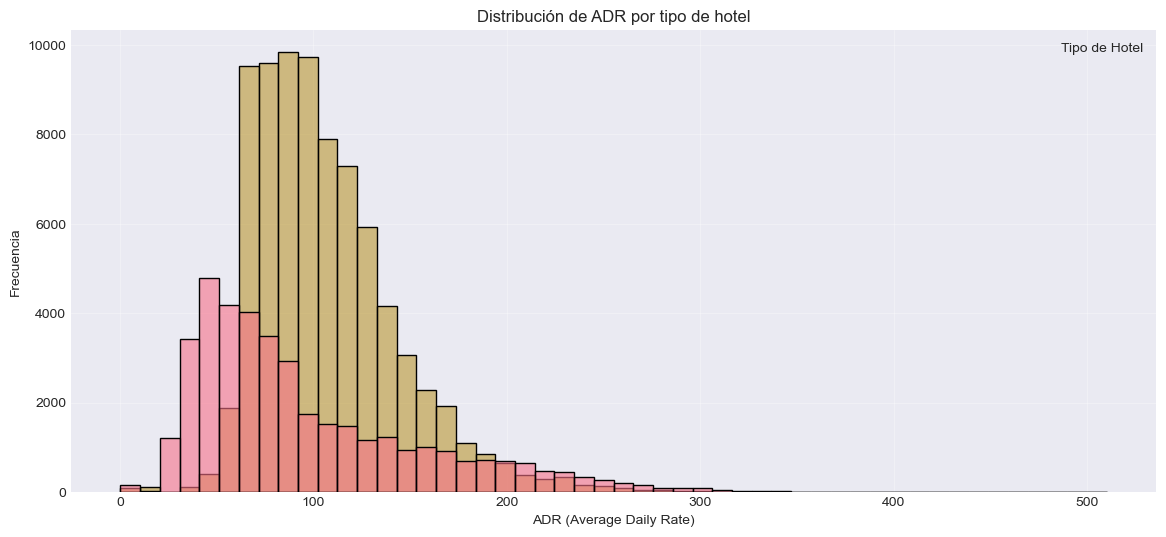

In [77]:
# Histograma de ADR por tipo de hotel
plt.figure(figsize=(14, 6))
sns.histplot(data=x, x='adr', hue='hotel', bins=50, edgecolor='black', alpha=0.6)
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Frecuencia')
plt.title('Distribución de ADR por tipo de hotel')
plt.legend(title='Tipo de Hotel')
plt.grid(alpha=0.3)
plt.show()

Se puede ver que los precios más comunes en Lisboa (hoteles de ciudad) están ligeramente a la derecha de los precios más comunes en el Algarve (hoteles resort), aunque los precios más altos en Lisboa disminuyen más rápidamente que en el Algarve. Usando un gráfico de violín, podemos ver más detalle, especialmente si también mostramos los cuartiles típicos de un box plot:

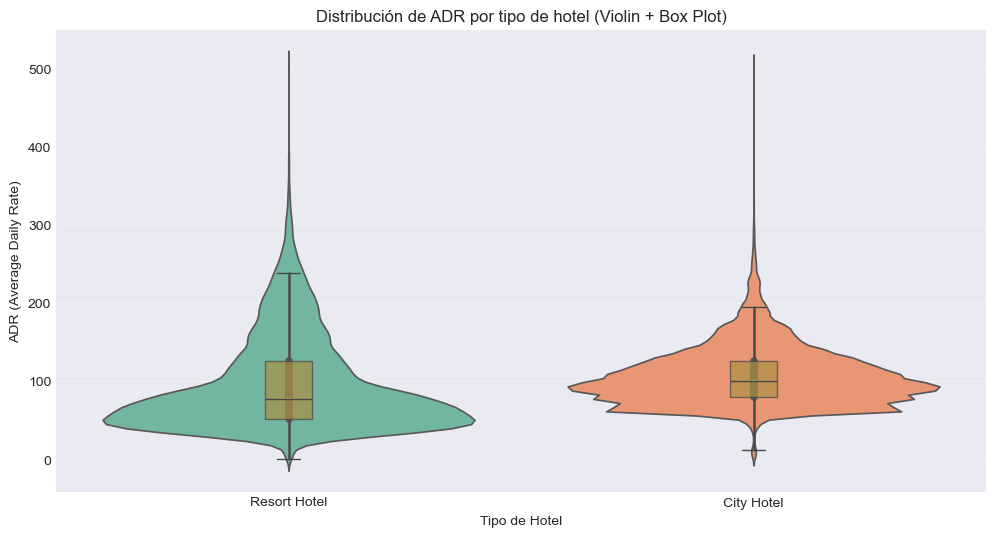

In [78]:
# Violin plot de ADR por tipo de hotel
plt.figure(figsize=(12, 6))
sns.violinplot(data=x, x='hotel', y='adr', palette='Set2')
sns.boxplot(data=x, x='hotel', y='adr', width=0.1, 
            boxprops=dict(alpha=0.7), showfliers=False)
plt.xlabel('Tipo de Hotel')
plt.ylabel('ADR (Average Daily Rate)')
plt.title('Distribución de ADR por tipo de hotel (Violin + Box Plot)')
plt.grid(alpha=0.3, axis='y')
plt.show()

Otra variable interesante es el origen de los huéspedes del hotel ('country'). El problema es que esta variable tiene muchos valores diferentes (178), por lo que deberíamos enfocarnos en los países con más turistas, también mostrando si eligen un hotel de ciudad o un resort:

<Figure size 1400x600 with 0 Axes>

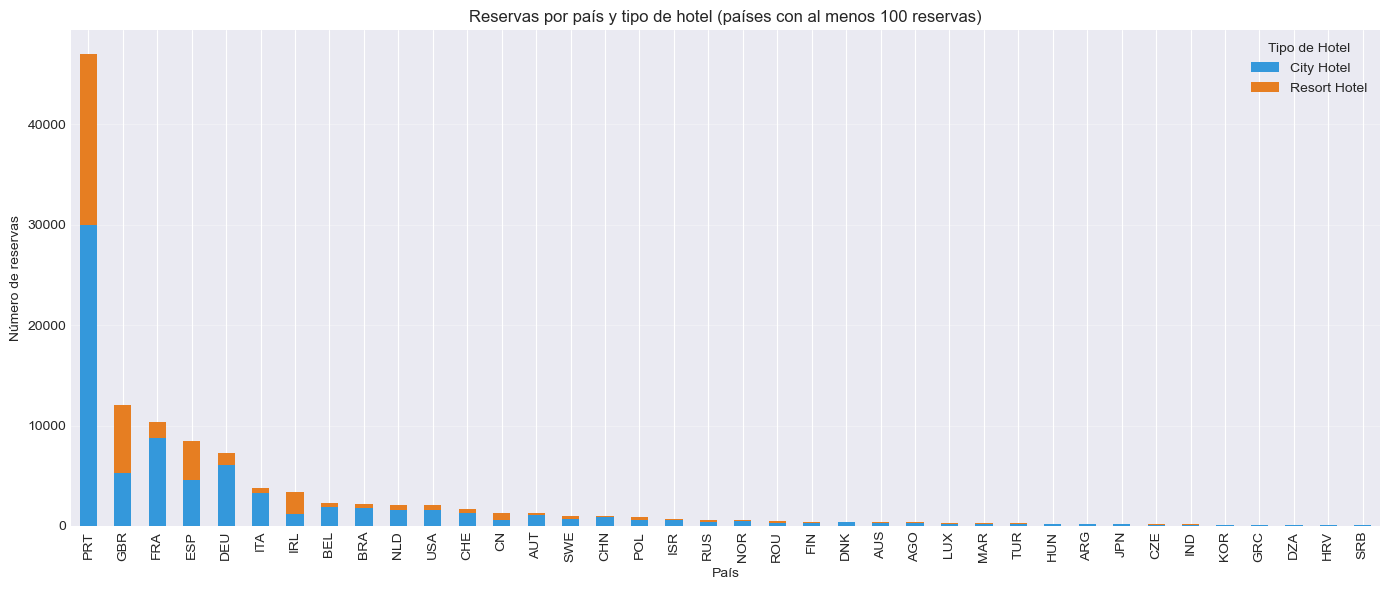

In [79]:
# Reservas por país (países con al menos 100 reservas)
xx = x.groupby('country').filter(lambda g: len(g) >= 100)
country_counts = xx.groupby(['country', 'hotel']).size().unstack(fill_value=0)
country_counts['total'] = country_counts.sum(axis=1)
country_counts = country_counts.sort_values('total', ascending=False)

# Gráfico de barras apiladas
plt.figure(figsize=(14, 6))
country_counts[['City Hotel', 'Resort Hotel']].plot(kind='bar', stacked=True, 
                                                      color=['#3498db', '#e67e22'],
                                                      figsize=(14, 6))
plt.xlabel('País')
plt.ylabel('Número de reservas')
plt.title('Reservas por país y tipo de hotel (países con al menos 100 reservas)')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Hotel')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Obviamente, Portugal (PRT) ocupa el primer lugar, seguido de países vecinos como Gran Bretaña, Francia y España. Los visitantes de Gran Bretaña e Irlanda tienen más probabilidades de elegir un resort, mientras que los de Francia, Alemania e Italia visitan principalmente Lisboa.

**EJERCICIO**: ¿Hay diferencias entre residentes de Portugal y el resto?

Otra variable interesante es 'is_canceled', que indica si una reserva fue cancelada o no. Podemos observar la relación entre dos variables categóricas usando un gráfico de mosaico. En Python, podemos usar diferentes aproximaciones para visualizar esta relación:

<Figure size 1200x600 with 0 Axes>

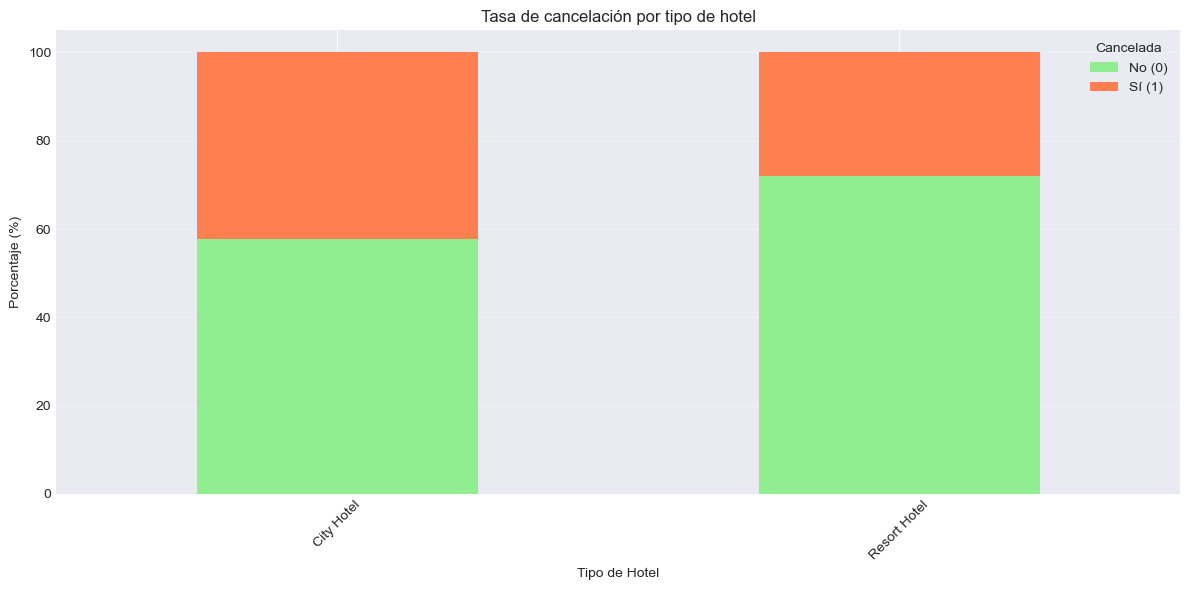


=== Tasa de cancelación por tipo de hotel ===
is_canceled           0          1
hotel                             
City Hotel    57.779343  42.220657
Resort Hotel  71.920318  28.079682


In [80]:
# Análisis de cancelaciones por tipo de hotel
x['is_canceled'] = x['is_canceled'].astype('category')

# Crear tabla de contingencia
cancel_hotel = pd.crosstab(x['hotel'], x['is_canceled'], normalize='index') * 100

# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
cancel_hotel.plot(kind='bar', stacked=True, 
                  color=['lightgreen', 'coral'],
                  figsize=(12, 6))
plt.xlabel('Tipo de Hotel')
plt.ylabel('Porcentaje (%)')
plt.title('Tasa de cancelación por tipo de hotel')
plt.xticks(rotation=45)
plt.legend(title='Cancelada', labels=['No (0)', 'Sí (1)'])
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Mostrar valores exactos
print("\n=== Tasa de cancelación por tipo de hotel ===")
print(cancel_hotel)

Se puede ver que la tasa de cancelación en un resort es menor que la de un hotel en Lisboa.

**EJERCICIO**: ¿Qué otro tipo de gráfico podría usarse para representar estos datos?

En el caso de cancelación por país para los países con más turistas:

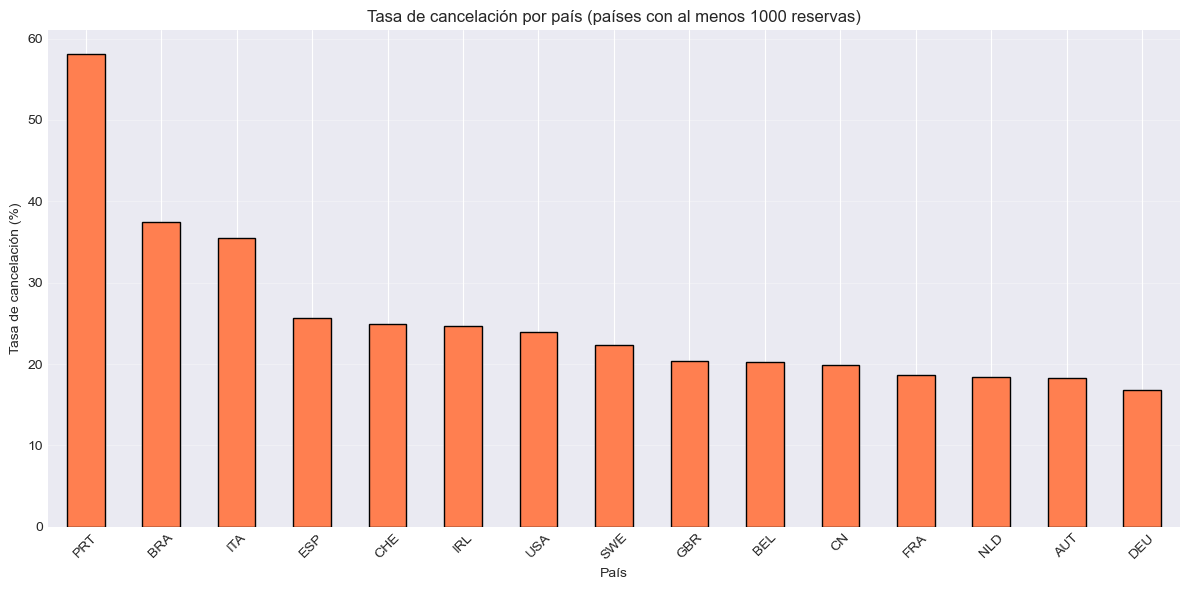

In [81]:
# Cancelaciones por país (al menos 1000 reservas)
xx = x.groupby('country').filter(lambda g: len(g) >= 1000)

# Calcular tasa de cancelación por país
cancel_by_country = xx.groupby('country')['is_canceled'].apply(
    lambda c: (c == 1).sum() / len(c) * 100
).sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
cancel_by_country.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('País')
plt.ylabel('Tasa de cancelación (%)')
plt.title('Tasa de cancelación por país (países con al menos 1000 reservas)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Se puede ver que la tasa de cancelación es mucho más alta para los turistas locales (de Portugal, PRT), mientras que es mucho más baja para el resto de los países.

**EJERCICIO**: Mejorar el gráfico anterior para hacerlo más comprensible y considerar si es posible visualizar las relaciones entre tres o más variables categóricas.

### Heatmap mejorado de cancelaciones

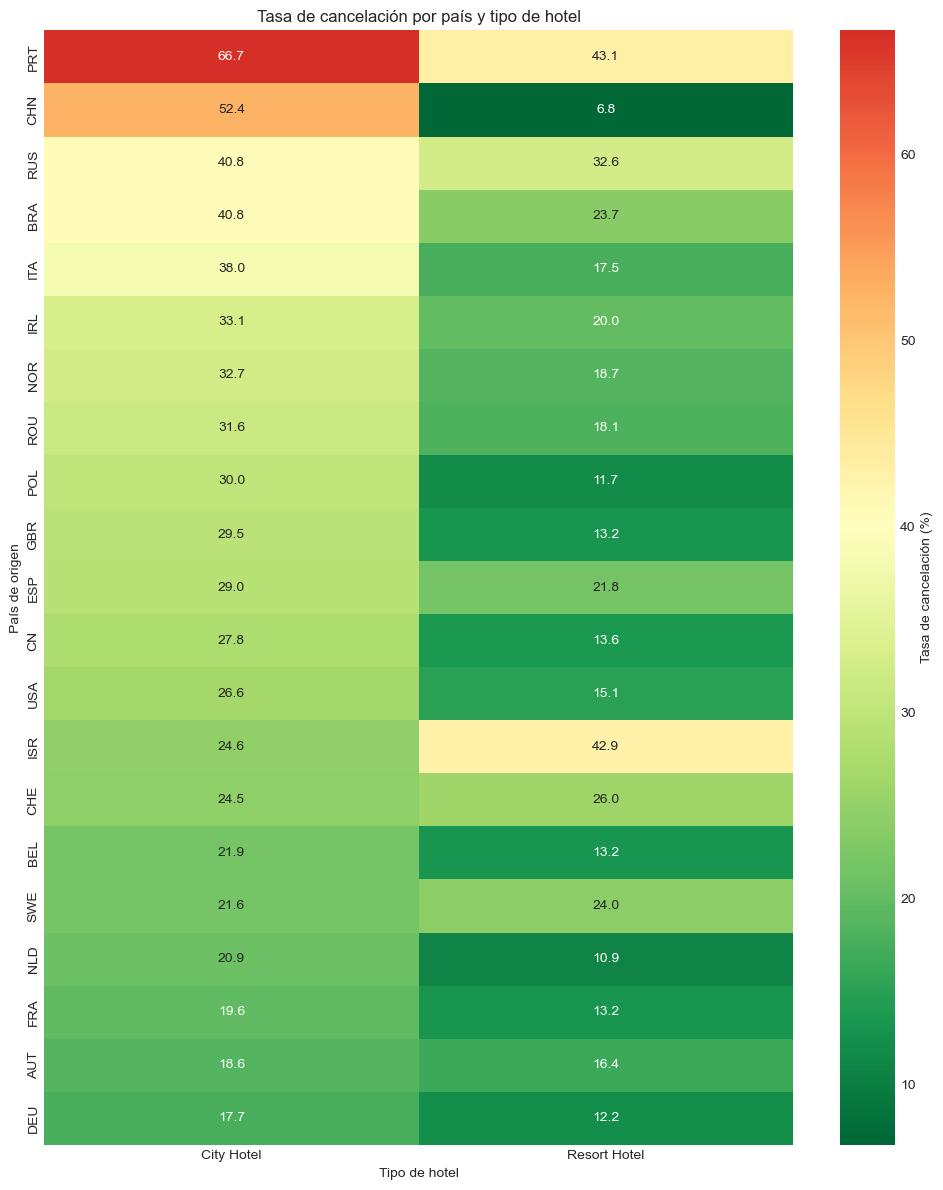

In [82]:
# Heatmap de cancelación por país y tipo de hotel
xx = x.groupby('country').filter(lambda g: len(g) >= 500)
heat_data = xx.groupby(['country', 'hotel'])['is_canceled'].apply(
    lambda c: (c == 1).sum() / len(c) * 100
).unstack(fill_value=0)

plt.figure(figsize=(10, 12))
sns.heatmap(heat_data.sort_values('City Hotel', ascending=False), 
            annot=True, fmt='.1f', cmap='RdYlGn_r', center=40,
            cbar_kws={'label': 'Tasa de cancelación (%)'})
plt.title('Tasa de cancelación por país y tipo de hotel')
plt.xlabel('Tipo de hotel')
plt.ylabel('País de origen')
plt.tight_layout()
plt.show()

### Análisis temporal

Finalmente, analicemos el comportamiento de las reservas en relación con la fecha de llegada. Crearemos una variable 'dia' para determinar el día de la semana en que se hizo el check-in al hotel y analizar cuántas reservas hubo cada día:

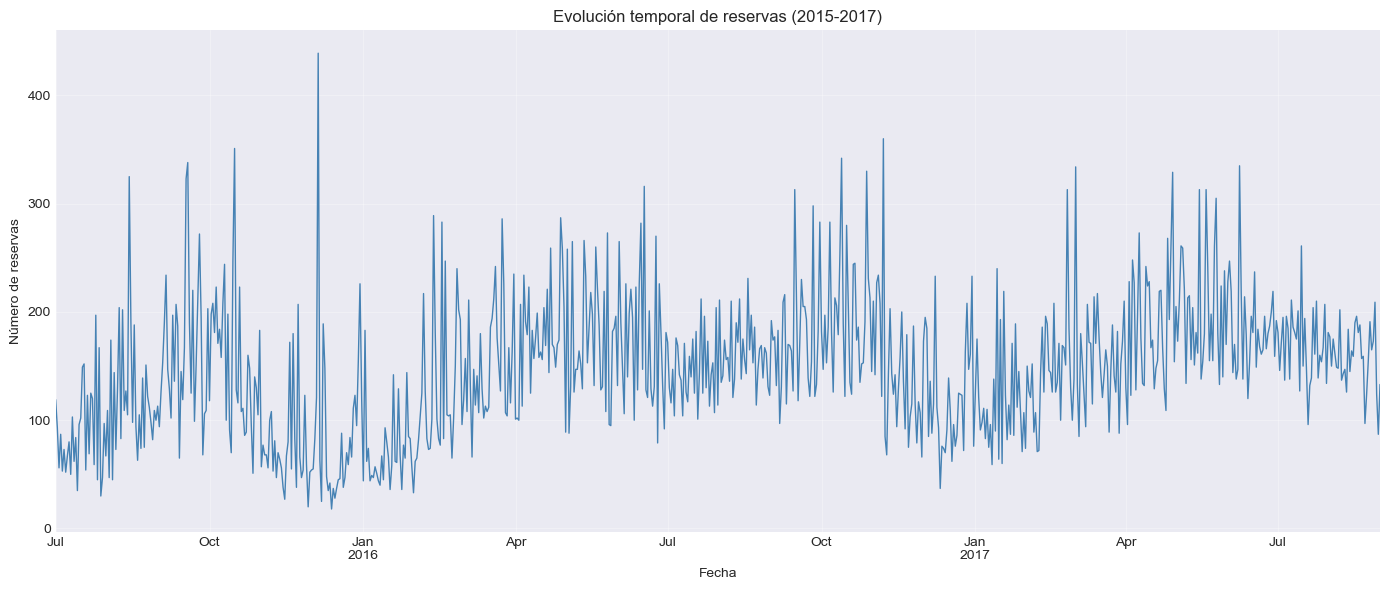


Día con más reservas: 2015-12-05 00:00:00
Máximo de reservas en un día: 439


In [83]:
# Crear variable de fecha
x['dia'] = pd.to_datetime(x['arrival_date_year'].astype(str) + '-' + 
                          x['arrival_date_month'] + '-' + 
                          x['arrival_date_day_of_month'].astype(str))

# Contar reservas por día
bookings_by_date = x.groupby('dia').size()

# Gráfico temporal
plt.figure(figsize=(14, 6))
bookings_by_date.plot(color='steelblue', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('Número de reservas')
plt.title('Evolución temporal de reservas (2015-2017)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDía con más reservas: {bookings_by_date.idxmax()}")
print(f"Máximo de reservas en un día: {bookings_by_date.max()}")

Como se describe en el artículo, los datos cubren el período del 1 de julio de 2015 al 31 de agosto de 2017. Se pueden observar algunos picos que podrían ser interesantes de explicar.

### Clasificación del tipo de viaje

Con el día calculado 'dia', junto con las variables 'stays_in_week_nights' y 'stays_in_weekend_nights', podemos intentar categorizar manualmente el tipo de viaje según los siguientes criterios:

1. Si 'stays_in_weekend_nights' es cero => viaje de trabajo
2. Si 'stays_in_week_nights' es cero o uno y en este caso la entrada es el viernes => fin de semana
3. Si 'stays_in_week_nights' es cinco y 'stays_in_weekend_nights' es tres o cuatro => paquete semanal de vacaciones
4. Si 'stays_in_weekend_nights' es uno o dos y 'stays_in_week_days' es cinco o menos => trabajo + descanso
5. El resto de combinaciones => vacaciones

In [84]:
# Clasificar tipo de visita
def clasificar_tipo(row):
    if row['stays_in_weekend_nights'] == 0:
        return 'Trabajo'
    elif row['stays_in_week_nights'] == 0:
        return 'Fin de semana'
    elif row['stays_in_week_nights'] == 1 and row['dia'].dayofweek == 5:  # 5 = Friday
        return 'Fin de semana'
    elif row['stays_in_week_nights'] == 5 and row['stays_in_weekend_nights'] in [3, 4]:
        return 'Paquete vacacional'
    elif row['stays_in_week_nights'] <= 5 and row['stays_in_weekend_nights'] < 3:
        return 'Trabajo más descanso'
    else:
        return 'Descanso'

x['tipo'] = x.apply(clasificar_tipo, axis=1)

print("=== Distribución de tipos de visita ===")
print(x['tipo'].value_counts())
print(f"\nPorcentajes:")
print(x['tipo'].value_counts(normalize=True) * 100)

=== Distribución de tipos de visita ===
tipo
Trabajo                 50489
Trabajo más descanso    47659
Fin de semana           14049
Descanso                 4796
Paquete vacacional        398
Name: count, dtype: int64

Porcentajes:
tipo
Trabajo                 43.009260
Trabajo más descanso    40.598513
Fin de semana           11.967698
Descanso                 4.085492
Paquete vacacional       0.339038
Name: proportion, dtype: float64


## Análisis exploratorio final

**EJERCICIO**: Debe explorar dicho conjunto de datos enriquecido y, en este proceso de exploración, decidir qué historia quiere contar sobre él. Algunas ideas:

1. ¿Los turistas de diferentes países viajan en fechas diferentes?
2. Diferencias en cancelaciones entre grupos (países, tipo de estancia, ...)
3. Relación entre tipo de estancia 'tipo' y coste 'adr'
4. Diferencias entre grupos con respecto al tipo de hotel (ciudad / resort)

### 1) ¿Los turistas de diferentes países viajan en fechas diferentes?

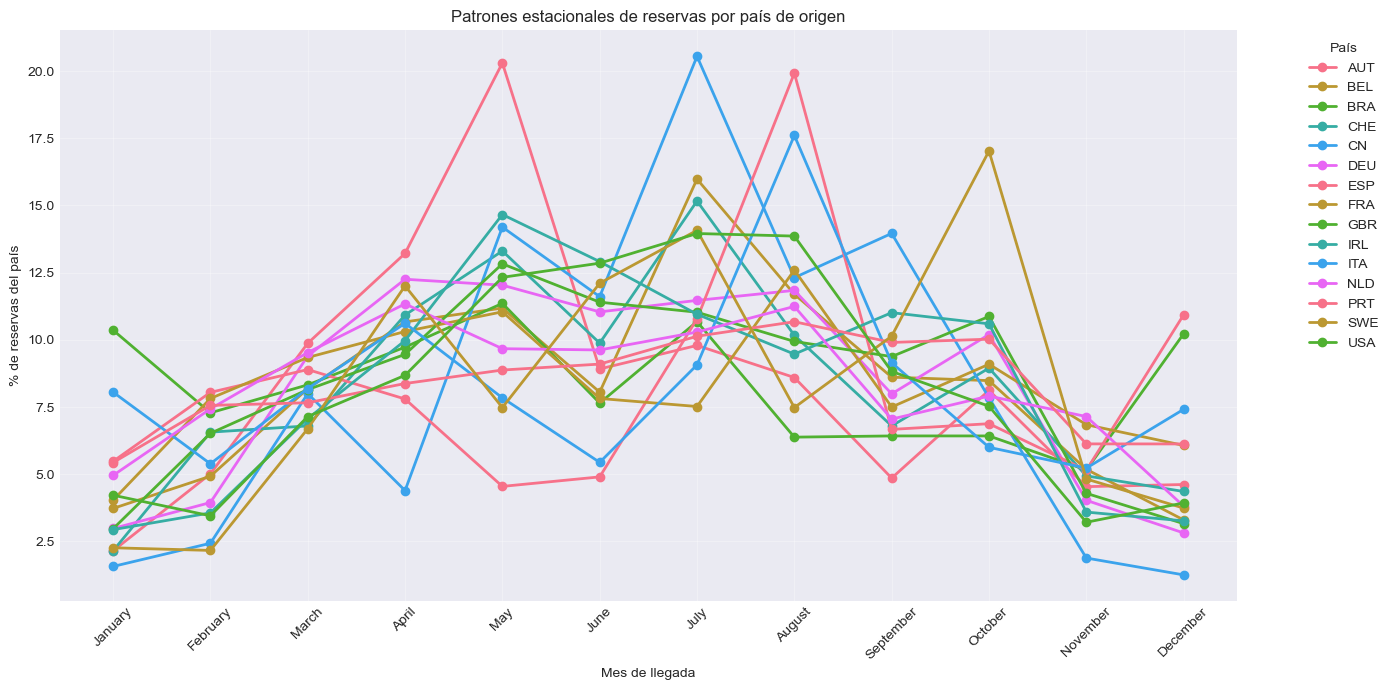

In [85]:
# Patrones estacionales por país
xx = x.groupby('country').filter(lambda g: len(g) >= 1000)

# Ordenar meses correctamente
month_order = list(calendar.month_name)[1:]  # Excluir el primer elemento vacío
xx['arrival_date_month_cat'] = pd.Categorical(xx['arrival_date_month'], 
                                                categories=month_order, 
                                                ordered=True)

# Calcular porcentajes por país y mes
seasonal_data = xx.groupby(['country', 'arrival_date_month_cat']).size().reset_index(name='n_bookings')
seasonal_data['pct_bookings'] = seasonal_data.groupby('country')['n_bookings'].transform(lambda x: x / x.sum() * 100)

# Gráfico de líneas
plt.figure(figsize=(14, 7))
for country in seasonal_data['country'].unique():
    data = seasonal_data[seasonal_data['country'] == country]
    plt.plot(data['arrival_date_month_cat'], data['pct_bookings'], 
             marker='o', label=country, linewidth=2)

plt.xlabel('Mes de llegada')
plt.ylabel('% de reservas del país')
plt.title('Patrones estacionales de reservas por país de origen')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 1.1 El mismo gráfico según el hotel

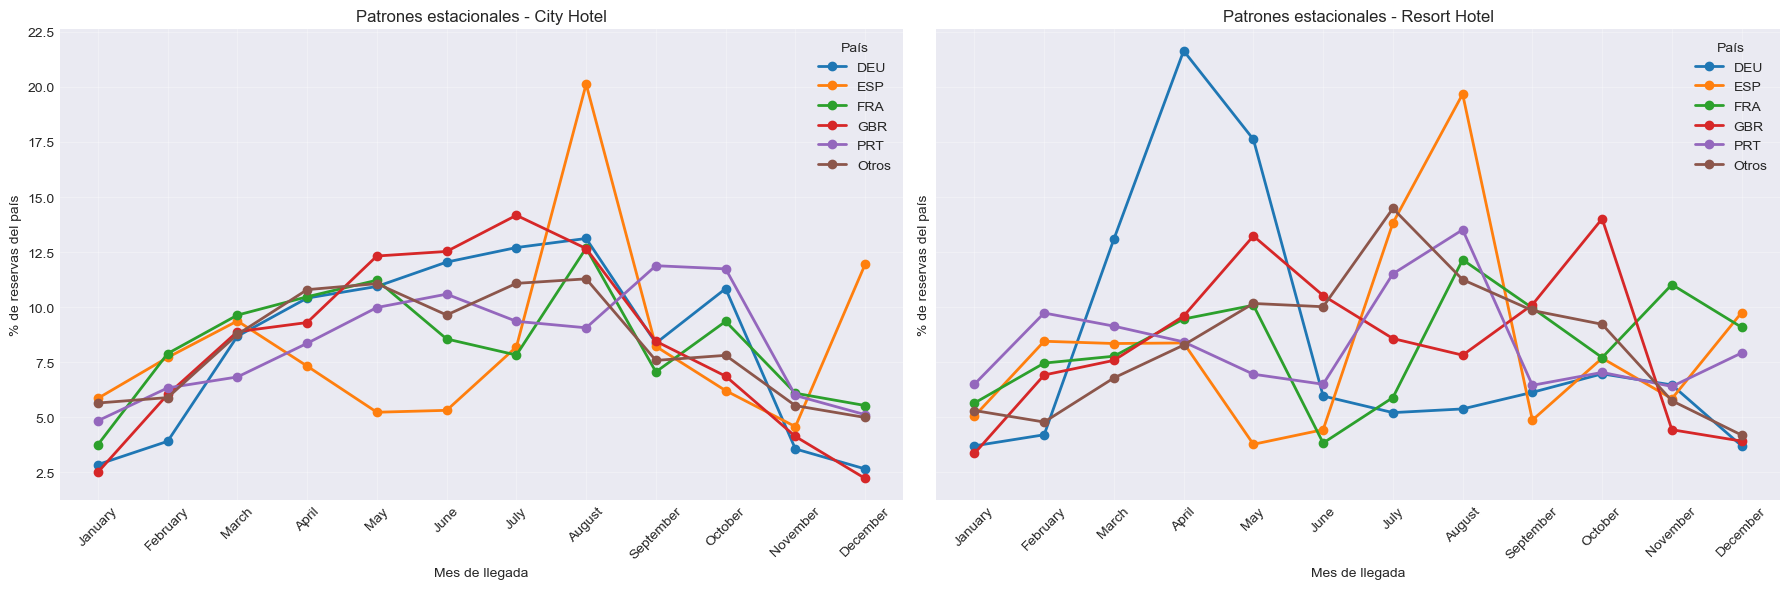


Top 5 países: PRT, GBR, FRA, ESP, DEU
Resto de países agrupados en: 'Otros'
Total de reservas en 'Otros': 32227


In [86]:
# Seleccionar los 5 países con más reservas
top_5_countries = x['country'].value_counts().nlargest(5).index.tolist()

# Crear nueva columna agrupando países
xx = x.copy()
xx['country_grouped'] = xx['country'].apply(lambda c: c if c in top_5_countries else 'Otros')

# Ordenar meses correctamente
month_order = list(calendar.month_name)[1:]
xx['arrival_date_month_cat'] = pd.Categorical(xx['arrival_date_month'], 
                                                categories=month_order, 
                                                ordered=True)

# Calcular porcentajes por país, mes Y HOTEL
seasonal_hotel_data = xx.groupby(['country_grouped', 'hotel', 'arrival_date_month_cat']).size().reset_index(name='n_bookings')
seasonal_hotel_data['pct_bookings'] = seasonal_hotel_data.groupby(['country_grouped', 'hotel'])['n_bookings'].transform(lambda x: x / x.sum() * 100)

# Crear subplots para cada tipo de hotel
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

hotels = seasonal_hotel_data['hotel'].unique()
# Ordenar países: Top 5 alfabéticamente + Otros al final
countries_order = sorted([c for c in seasonal_hotel_data['country_grouped'].unique() if c != 'Otros']) + ['Otros']
colors = plt.cm.tab10(range(len(countries_order)))
color_map = dict(zip(countries_order, colors))

for idx, hotel in enumerate(sorted(hotels)):
    ax = axes[idx]
    hotel_data = seasonal_hotel_data[seasonal_hotel_data['hotel'] == hotel]
    
    for country in countries_order:
        if country in hotel_data['country_grouped'].values:
            data = hotel_data[hotel_data['country_grouped'] == country]
            ax.plot(data['arrival_date_month_cat'], data['pct_bookings'], 
                    marker='o', label=country, linewidth=2, color=color_map[country])
    
    ax.set_xlabel('Mes de llegada')
    ax.set_ylabel('% de reservas del país')
    ax.set_title(f'Patrones estacionales - {hotel}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(alpha=0.3)
    ax.legend(title='País', loc='best')

plt.tight_layout()
plt.show()

print(f"\nTop 5 países: {', '.join(top_5_countries)}")
print(f"Resto de países agrupados en: 'Otros'")
print(f"Total de reservas en 'Otros': {len(xx[xx['country_grouped'] == 'Otros'])}")

**Interpretación**: Este gráfico muestra si hay diferencias en los patrones estacionales. Por ejemplo, turistas de Reino Unido pueden preferir verano, mientras que portugueses distribuyen más uniformemente.

### 2) Diferencias en cancelaciones entre grupos

<Figure size 1400x700 with 0 Axes>

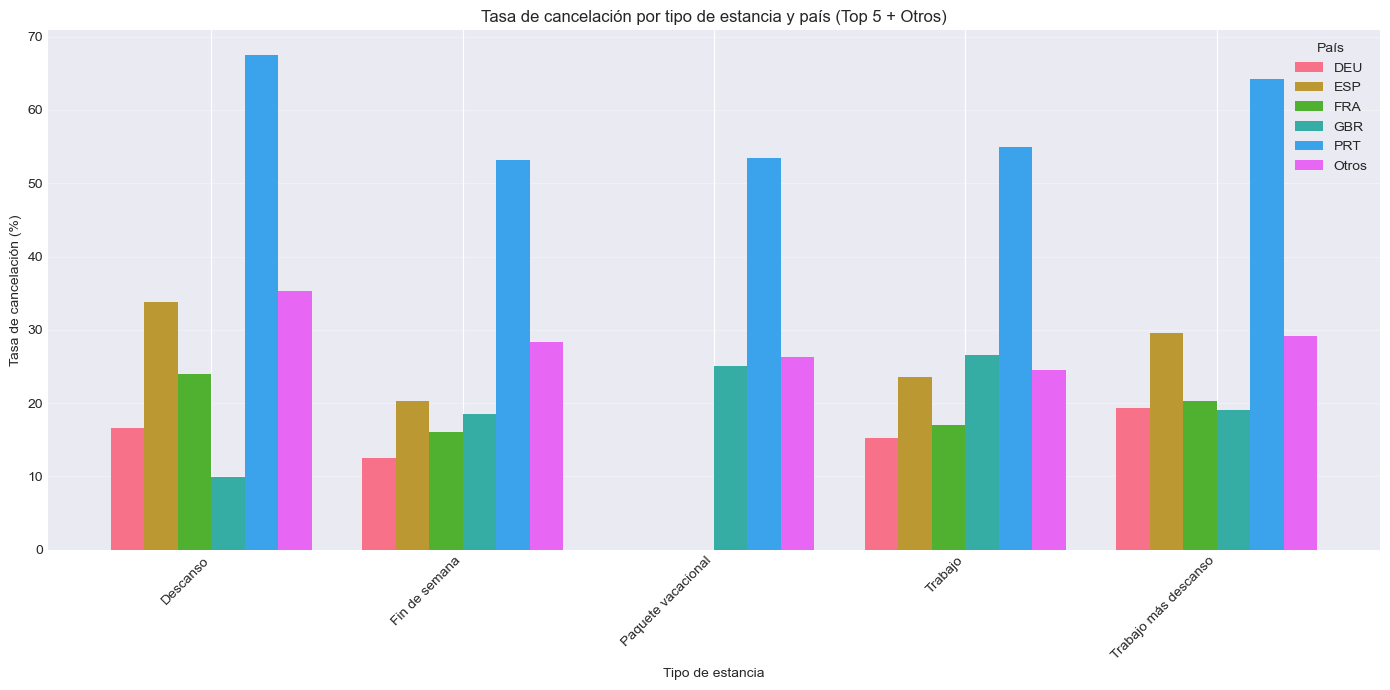


Top 5 países analizados: PRT, GBR, FRA, ESP, DEU
Resto de países agrupados en: 'Otros'


In [87]:
# Análisis de cancelaciones por tipo de estancia y país
# Definir los top 5 países
top_5_countries = ['PRT', 'GBR', 'FRA', 'ESP', 'DEU']

# Crear una copia del dataframe y agrupar países
cancel_data = x.copy()
cancel_data['country_grouped'] = cancel_data['country'].apply(
    lambda c: c if c in top_5_countries else 'Otros'
)

# Calcular estadísticas por país agrupado y tipo de estancia
cancel_summary = cancel_data.groupby(['country_grouped', 'tipo']).agg({
    'is_canceled': [('total', 'count'), 
                    ('canceladas', lambda c: (c == 1).sum()),
                    ('tasa_cancelacion', lambda c: (c == 1).sum() / len(c) * 100)]
}).reset_index()
cancel_summary.columns = ['country', 'tipo', 'total', 'canceladas', 'tasa_cancelacion']
cancel_summary = cancel_summary[cancel_summary['total'] >= 50]

# Gráfico de barras
plt.figure(figsize=(14, 7))
cancel_pivot = cancel_summary.pivot(index='tipo', columns='country', values='tasa_cancelacion')
# Ordenar columnas: top 5 alfabéticamente + Otros al final
cols_order = sorted([c for c in cancel_pivot.columns if c != 'Otros']) + (['Otros'] if 'Otros' in cancel_pivot.columns else [])
cancel_pivot = cancel_pivot[cols_order]

cancel_pivot.plot(kind='bar', width=0.8, figsize=(14, 7))
plt.xlabel('Tipo de estancia')
plt.ylabel('Tasa de cancelación (%)')
plt.title('Tasa de cancelación por tipo de estancia y país (Top 5 + Otros)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='País')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nTop 5 países analizados: {', '.join(top_5_countries)}")
print(f"Resto de países agrupados en: 'Otros'")

### 2.1) Cancelaciones según antelación de la reserva

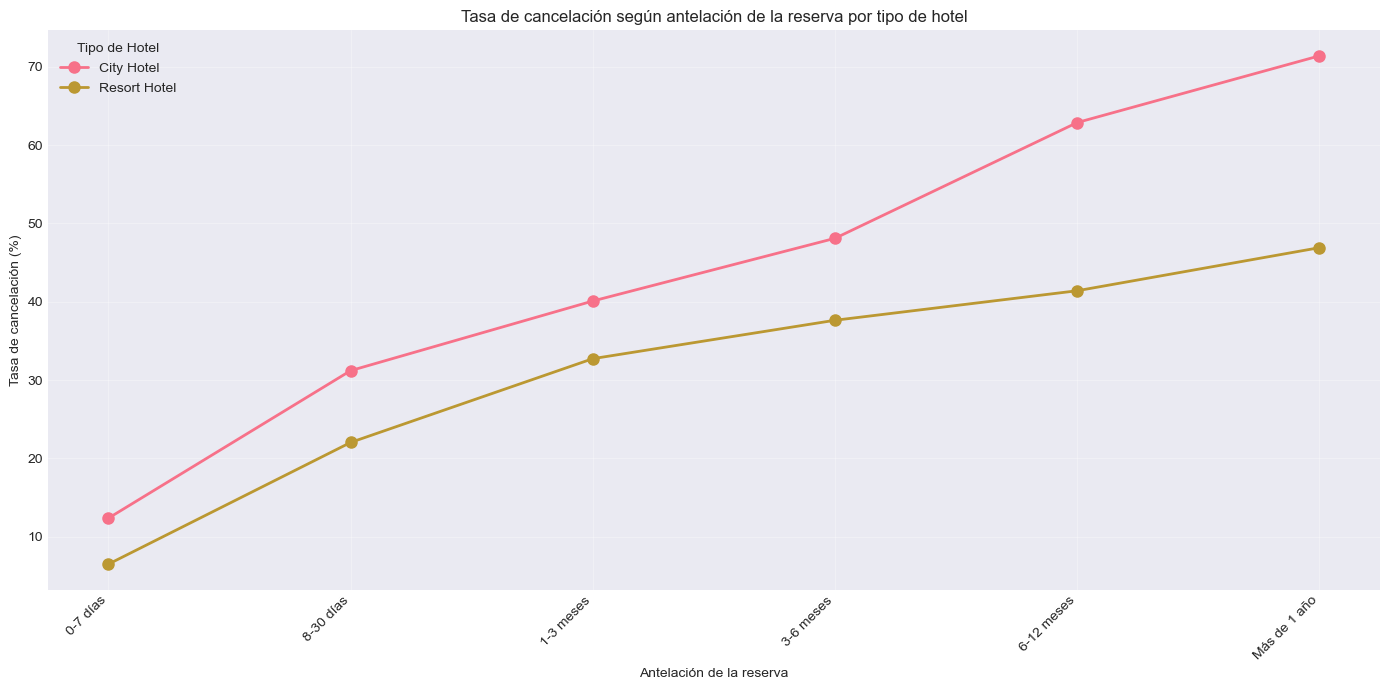

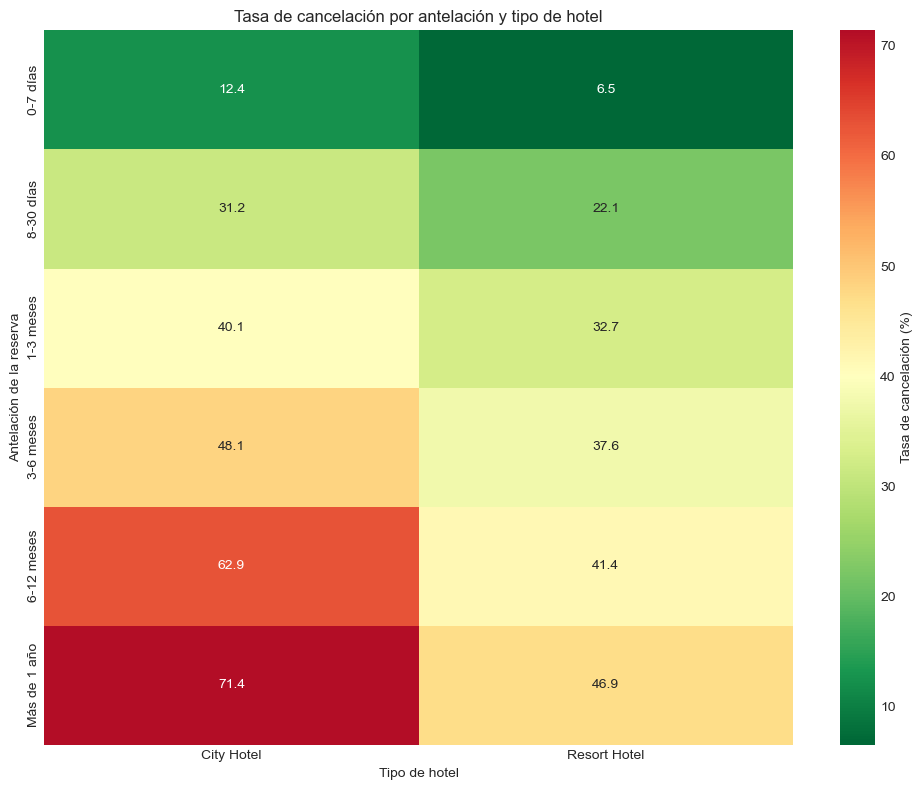

=== Tasa de cancelación por antelación y tipo de hotel ===
hotel         City Hotel  Resort Hotel
antelacion                            
0-7 días       12.388850      6.519967
8-30 días      31.215693     22.051774
1-3 meses      40.103637     32.743260
3-6 meses      48.108168     37.645759
6-12 meses     62.882311     41.413164
Más de 1 año   71.396731     46.910755


In [88]:
# Análisis de cancelaciones según antelación de la reserva
import matplotlib.pyplot as plt
import seaborn as sns

# Crear categorías de antelación
def categorizar_antelacion(dias):
    if dias <= 7:
        return '0-7 días'
    elif dias <= 30:
        return '8-30 días'
    elif dias <= 90:
        return '1-3 meses'
    elif dias <= 180:
        return '3-6 meses'
    elif dias <= 365:
        return '6-12 meses'
    else:
        return 'Más de 1 año'

x['antelacion_cat'] = x['lead_time'].apply(categorizar_antelacion)

# Ordenar categorías
cat_order = ['0-7 días', '8-30 días', '1-3 meses', '3-6 meses', '6-12 meses', 'Más de 1 año']
x['antelacion_cat'] = pd.Categorical(x['antelacion_cat'], categories=cat_order, ordered=True)

# Calcular tasa de cancelación por antelación y tipo de hotel
cancel_lead = x.groupby(['antelacion_cat', 'hotel'])['is_canceled'].apply(
    lambda c: (c == 1).sum() / len(c) * 100
).reset_index()
cancel_lead.columns = ['antelacion', 'hotel', 'tasa_cancelacion']

# Gráfico de líneas
plt.figure(figsize=(14, 7))
for hotel in cancel_lead['hotel'].unique():
    data = cancel_lead[cancel_lead['hotel'] == hotel]
    plt.plot(data['antelacion'], data['tasa_cancelacion'], 
             marker='o', label=hotel, linewidth=2, markersize=8)

plt.xlabel('Antelación de la reserva')
plt.ylabel('Tasa de cancelación (%)')
plt.title('Tasa de cancelación según antelación de la reserva por tipo de hotel')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Hotel')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap alternativo
cancel_pivot = cancel_lead.pivot(index='antelacion', columns='hotel', values='tasa_cancelacion')

plt.figure(figsize=(10, 8))
sns.heatmap(cancel_pivot, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            center=40, cbar_kws={'label': 'Tasa de cancelación (%)'})
plt.title('Tasa de cancelación por antelación y tipo de hotel')
plt.ylabel('Antelación de la reserva')
plt.xlabel('Tipo de hotel')
plt.tight_layout()
plt.show()

# Mostrar estadísticas
print("=== Tasa de cancelación por antelación y tipo de hotel ===")
print(cancel_pivot)

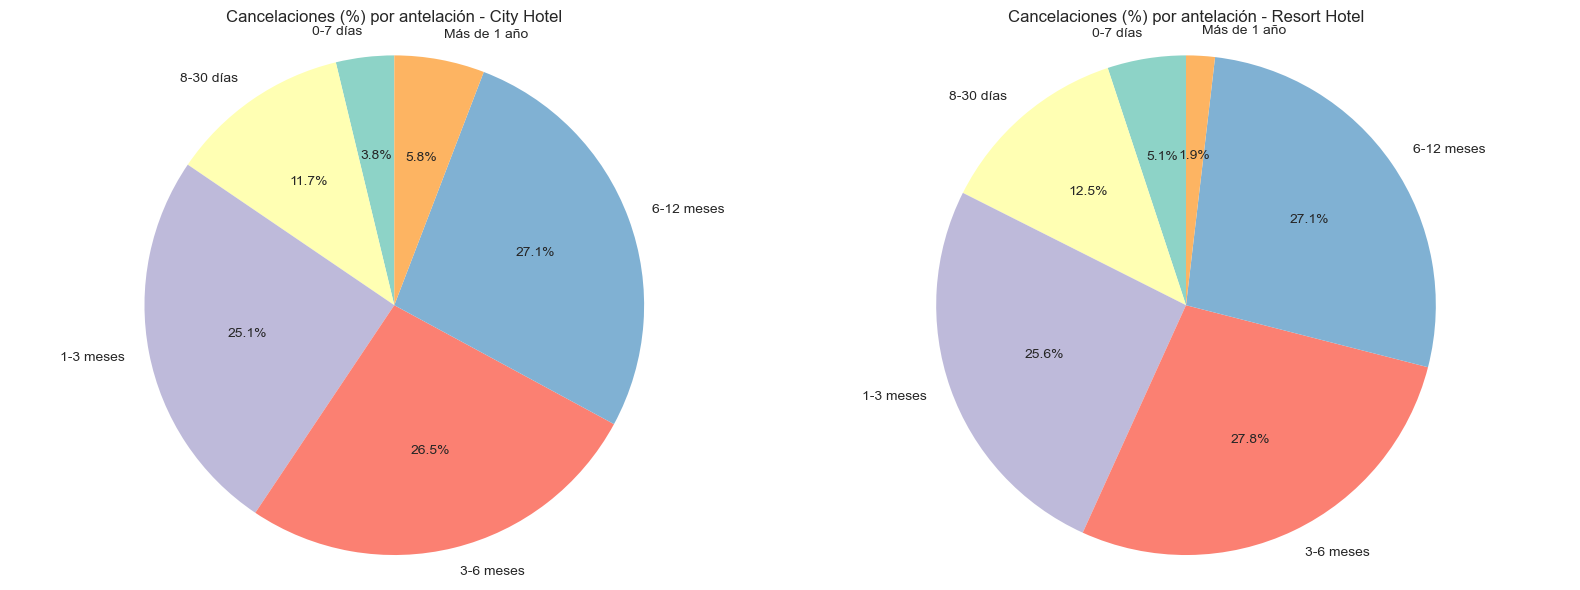

=== Cancelaciones (n) por antelación y hotel ===
antelacion_cat  0-7 días  8-30 días  1-3 meses  3-6 meses  6-12 meses  \
hotel                                                                   
City Hotel          1240       3867       8281       8735        8923   
Resort Hotel         560       1380       2830       3067        2995   

antelacion_cat  Más de 1 año  
hotel                         
City Hotel              1922  
Resort Hotel             205  


In [89]:
# Pastel colors for the six antelación categorías
lead_colors = plt.cm.Set3(range(len(cat_order)))

# Cancelaciones por antelación y hotel (conteos)
cancel_by_lead_hotel = (
  x.groupby(['hotel', 'antelacion_cat'])['is_canceled']
   .apply(lambda c: (c == 1).sum())
   .unstack(fill_value=0)
  .reindex(columns=cat_order)
)

# Gráficos de tarta: porcentaje sobre el total de cancelaciones por hotel
fig, axs = plt.subplots(1, len(hotels), figsize=(16, 6))
for idx, hotel in enumerate(hotels):
  sizes = cancel_by_lead_hotel.loc[hotel].values  # conteos por categoría
  axs[idx].pie(
    sizes,
    labels=cat_order,
    autopct='%1.1f%%',
    startangle=90,
    colors=lead_colors
  )
  axs[idx].axis('equal')
  axs[idx].set_title(f'Cancelaciones (%) por antelación - {hotel}')

plt.tight_layout()
plt.show()

print("=== Cancelaciones (n) por antelación y hotel ===")
print(cancel_by_lead_hotel)

### 3) Relación entre tipo de estancia y coste

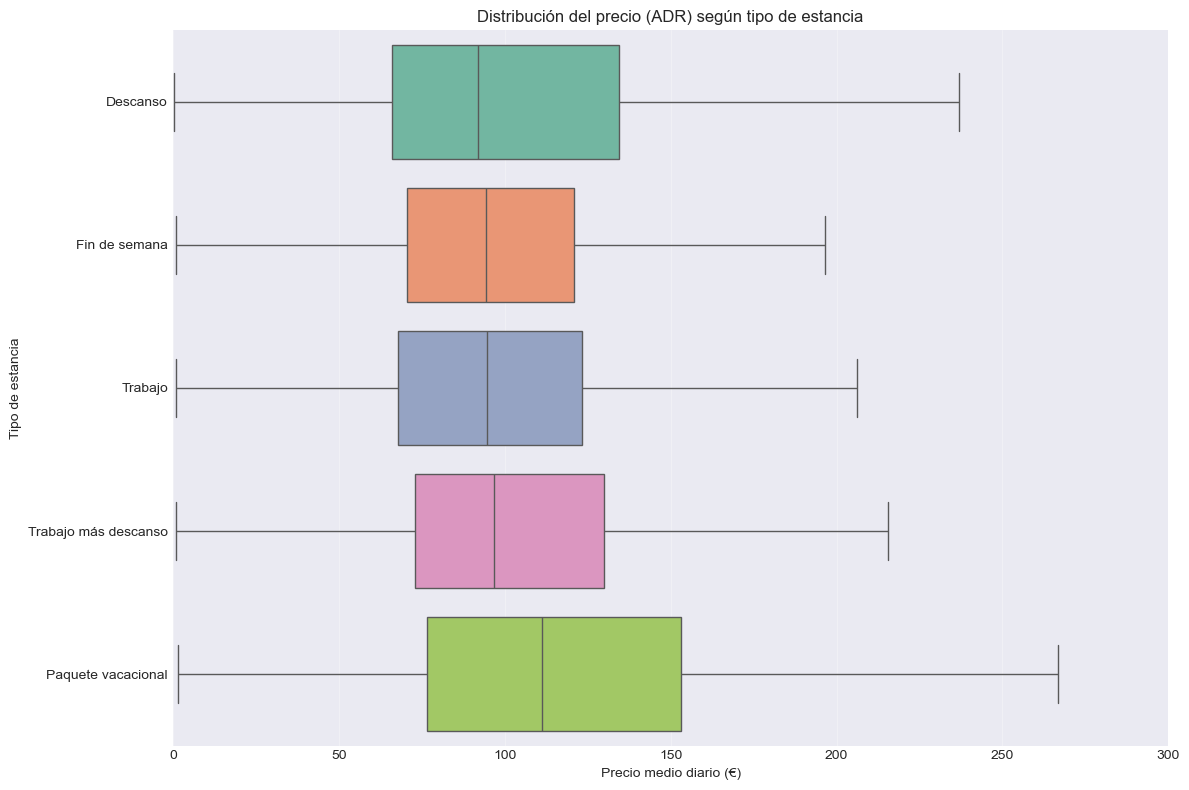

In [90]:
# Box plots por tipo de estancia
tipo_order = x.groupby('tipo')['adr'].median().sort_values().index

plt.figure(figsize=(12, 8))
sns.boxplot(data=x, y='tipo', x='adr', order=tipo_order, palette='Set2', 
            showfliers=False)
plt.xlim(0, 300)
plt.xlabel('Precio medio diario (€)')
plt.ylabel('Tipo de estancia')
plt.title('Distribución del precio (ADR) según tipo de estancia')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 4) Diferencias entre grupos respecto al tipo de hotel

<Figure size 1400x700 with 0 Axes>

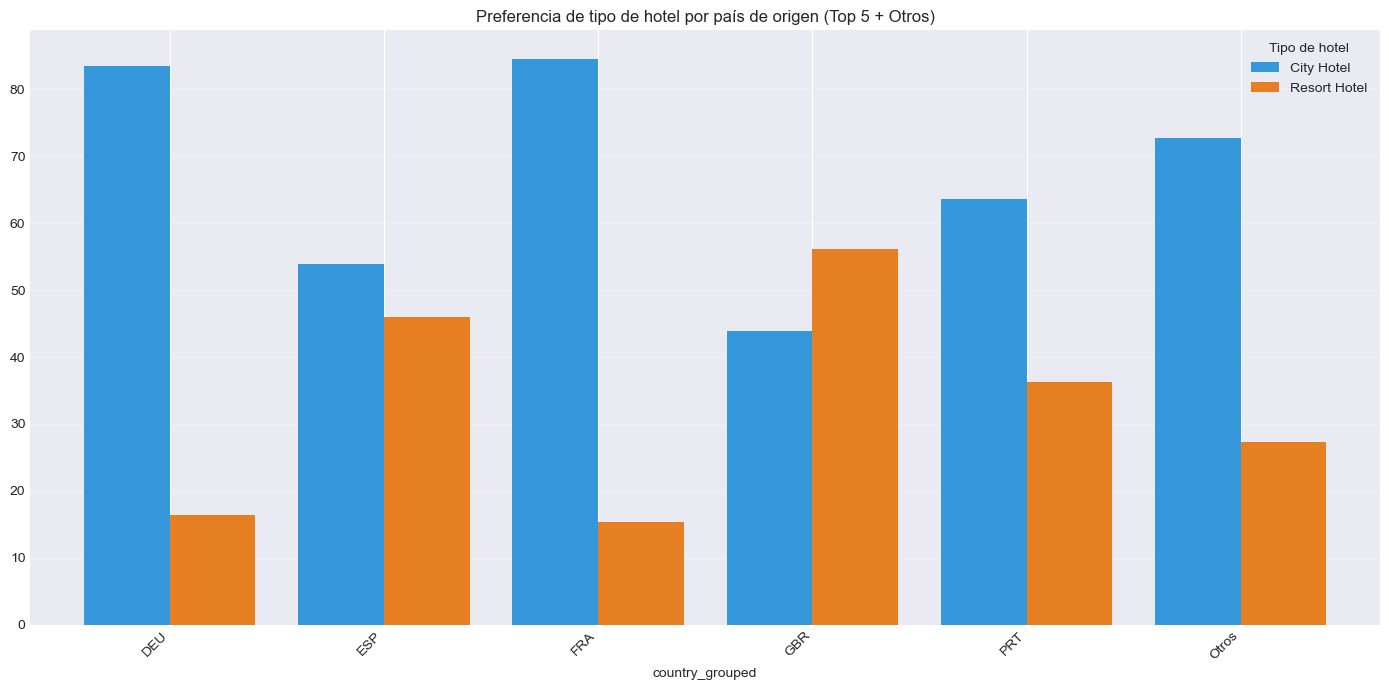


Top 5 países: PRT, GBR, FRA, ESP, DEU
Resto de países agrupados en: 'Otros'


In [91]:
# Preferencia de hotel por país - Top 5 + Otros
# Obtener los 5 países con más reservas
top_5_countries = x['country'].value_counts().nlargest(5).index.tolist()

# Crear copia del dataframe y agrupar países
xx = x.copy()
xx['country_grouped'] = xx['country'].apply(lambda c: c if c in top_5_countries else 'Otros')

# Calcular preferencias de hotel por país agrupado
hotel_pref = xx.groupby(['country_grouped', 'hotel']).size().unstack(fill_value=0)
hotel_pref_pct = hotel_pref.div(hotel_pref.sum(axis=1), axis=0) * 100

# Ordenar: Top 5 alfabéticamente + Otros al final
countries_order = sorted([c for c in hotel_pref_pct.index if c != 'Otros']) + (['Otros'] if 'Otros' in hotel_pref_pct.index else [])
hotel_pref_pct = hotel_pref_pct.loc[countries_order]

# Gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
hotel_pref_pct.plot(kind='bar', width=0.8, 
                    color=['#3498db', '#e67e22'], 
                    figsize=(14, 7))
plt.title('Preferencia de tipo de hotel por país de origen (Top 5 + Otros)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de hotel', labels=['City Hotel', 'Resort Hotel'])
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nTop 5 países: {', '.join(top_5_countries)}")
print(f"Resto de países agrupados en: 'Otros'")

### Análisis adicional: Composición familiar

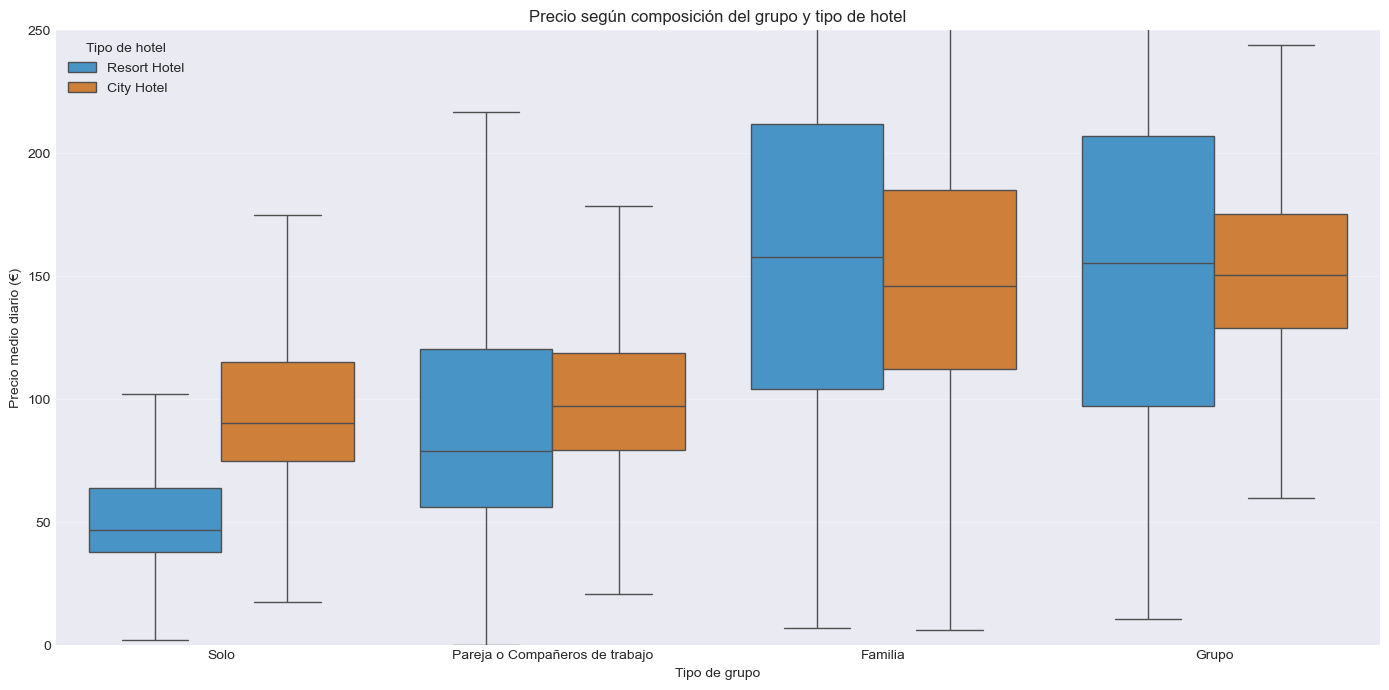

In [92]:
# Crear variable de composición familiar
def clasificar_familia(row):
    if row['children'] > 0 or row['babies'] > 0:
        return 'Familia'
    elif row['adults'] == 1:
        return 'Solo'
    elif row['adults'] == 2:
        return 'Pareja o Compañeros de trabajo'
    elif row['adults'] >= 3:
        return 'Grupo'
    else:
        return 'Otro'

x['family_type'] = x.apply(clasificar_familia, axis=1)
x['total_guests'] = x['adults'] + x['children'] + x['babies']

# ADR por composición familiar y tipo de hotel
plt.figure(figsize=(14, 7))
sns.boxplot(data=x, x='family_type', y='adr', hue='hotel', 
            palette=['#3498db', '#e67e22'], 
            showfliers=False)
plt.ylim(0, 250)
plt.xlabel('Tipo de grupo')
plt.ylabel('Precio medio diario (€)')
plt.title('Precio según composición del grupo y tipo de hotel')
plt.legend(title='Tipo de hotel')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

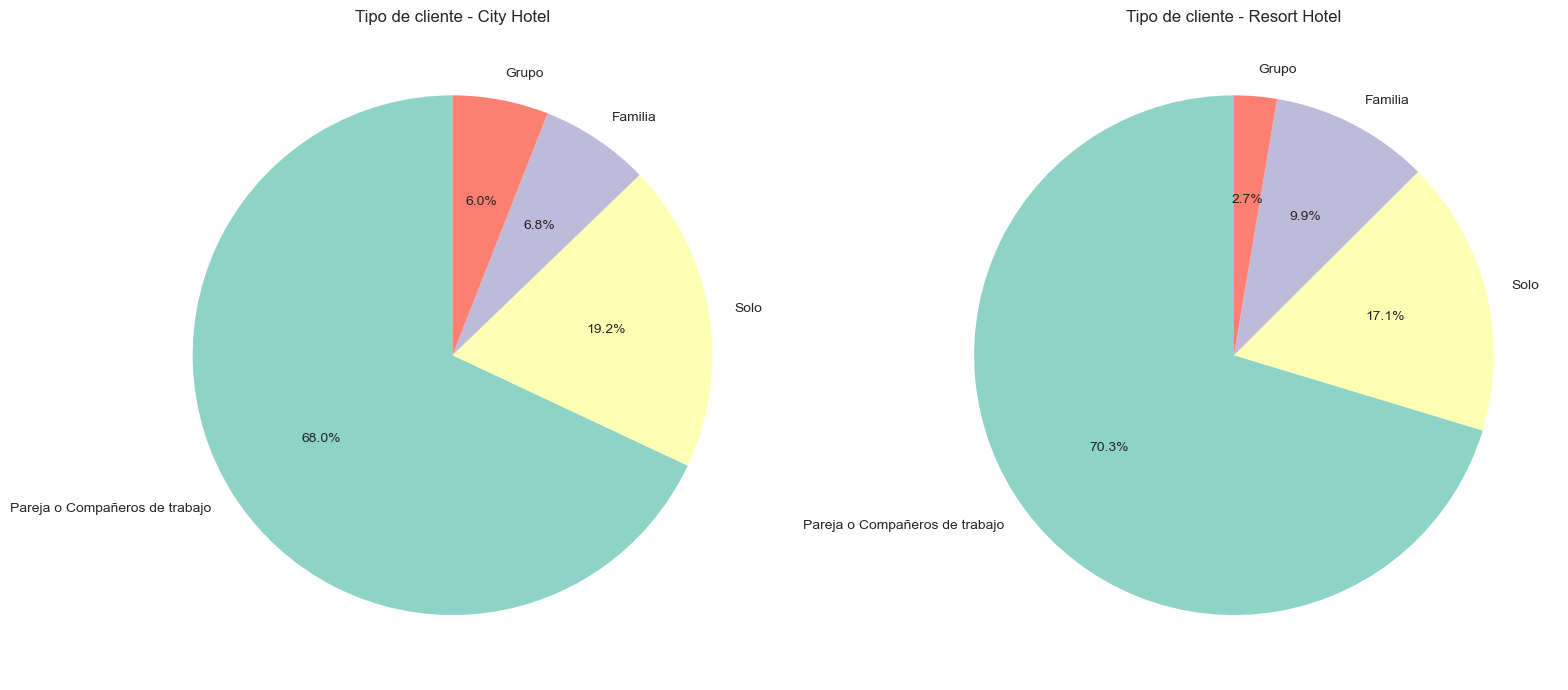

=== Composición por tipo de hotel ===
hotel                           City Hotel  Resort Hotel     All
family_type                                                     
Familia                               5336          3883    9219
Grupo                                 4657          1043    5700
Pareja o Compañeros de trabajo       53110         27641   80751
Solo                                 14982          6739   21721
All                                  78085         39306  117391


In [93]:
# Gráficos de tarta por composición familiar y tipo de hotel
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Calcular porcentajes por tipo de hotel
for idx, hotel in enumerate(['City Hotel', 'Resort Hotel']):
    hotel_data = x[x['hotel'] == hotel]
    family_counts = hotel_data['family_type'].value_counts()
    
    axes[idx].pie(family_counts.values, labels=family_counts.index, 
                  autopct='%1.1f%%', startangle=90,
                  colors=plt.cm.Set3(range(len(family_counts))))
    axes[idx].set_title(f'Tipo de cliente - {hotel}')

plt.tight_layout()
plt.show()

# Mostrar números absolutos
print("=== Composición por tipo de hotel ===")
print(pd.crosstab(x['family_type'], x['hotel'], margins=True))